# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, silhouette_score # Added silhouette_score
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans # Added KMeans
from yellowbrick.cluster import KElbowVisualizer # Added KElbowVisualizer

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

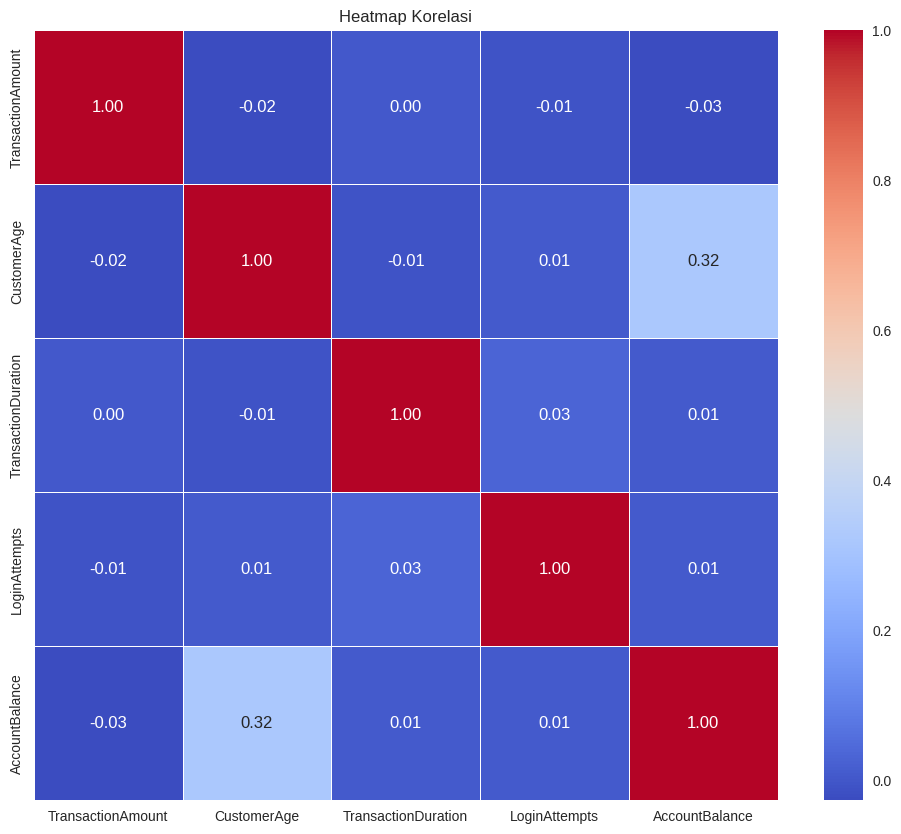

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
num_features = df.select_dtypes(include=['float64'])
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

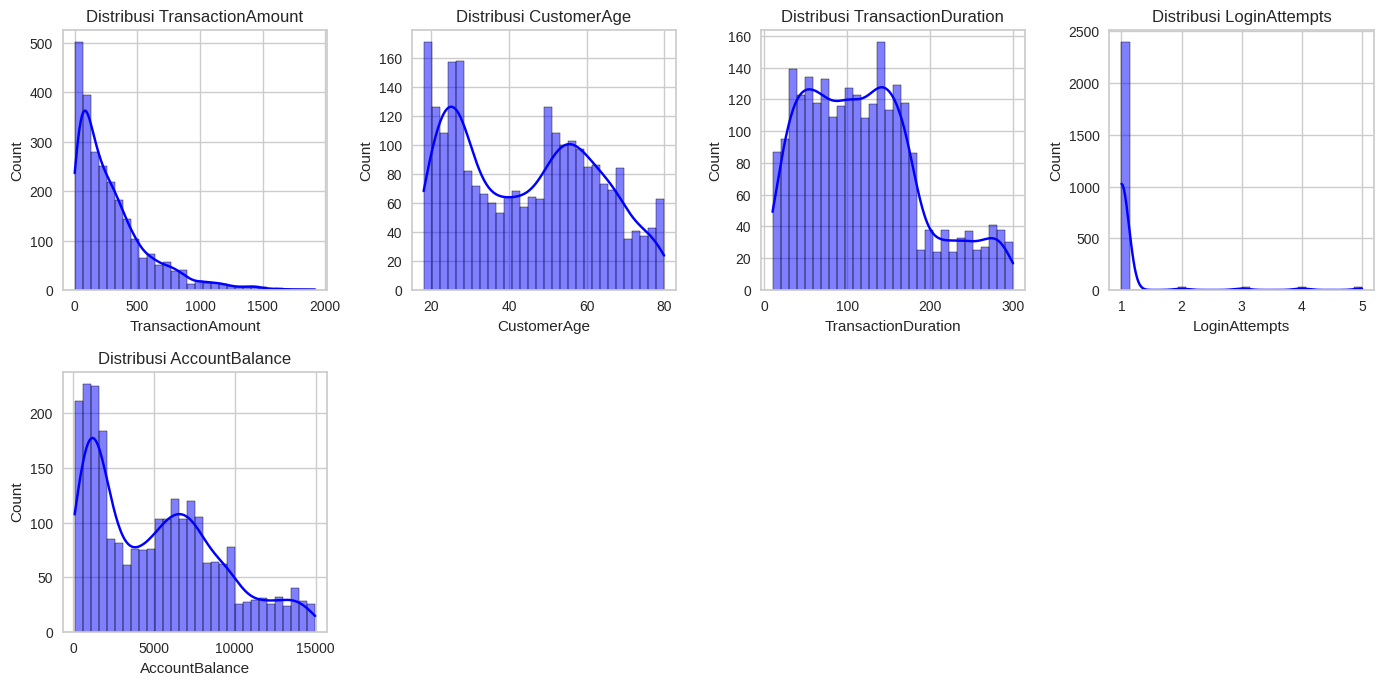

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [10]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address'], axis=1)
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categorical_cols = df.select_dtypes(include='object').columns.tolist()
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

less = missing_values[missing_values < 1000].index
over = missing_values[missing_values >= 1000].index
numeric_features = df[less].select_dtypes(include=['number']).columns
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())
kategorical_features = df[less].select_dtypes(include=['object']).columns

for column in kategorical_features:
    df[column] = df[column].fillna(df[column].mode()[0])

df.isnull().sum()

,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

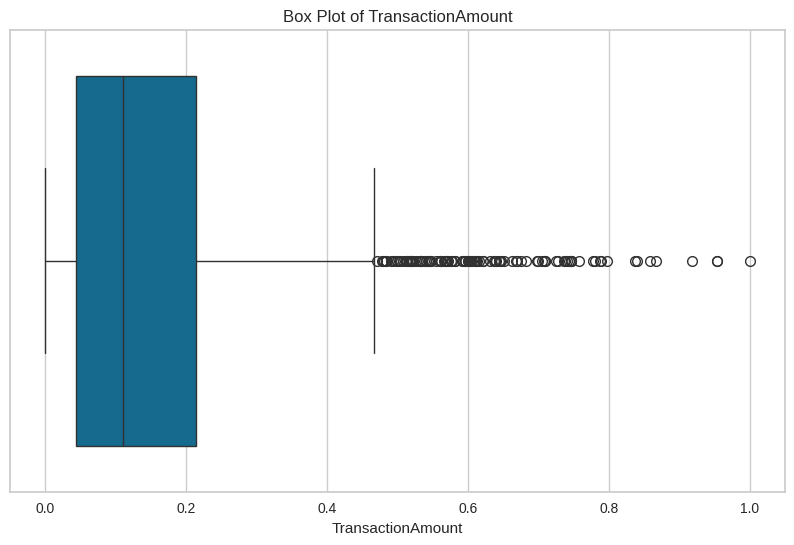

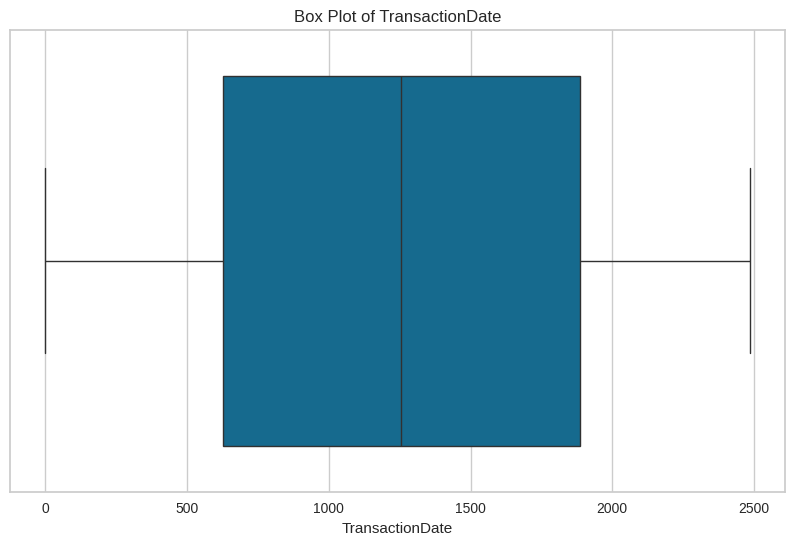

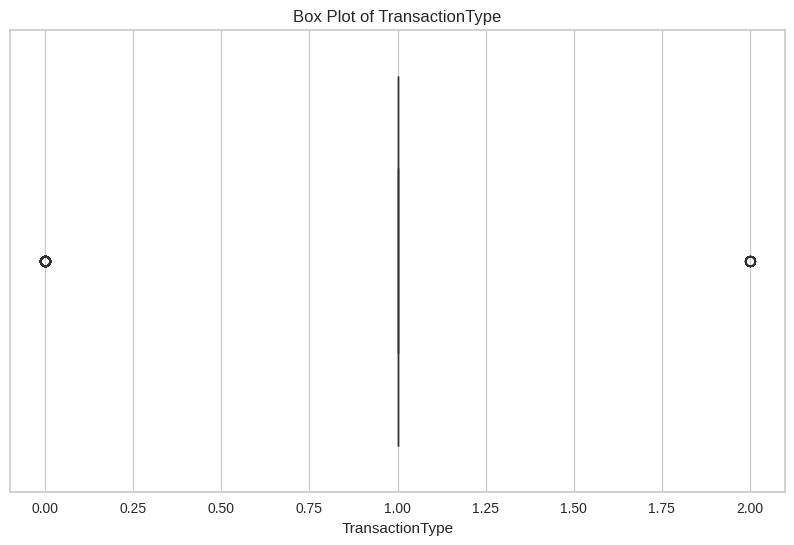

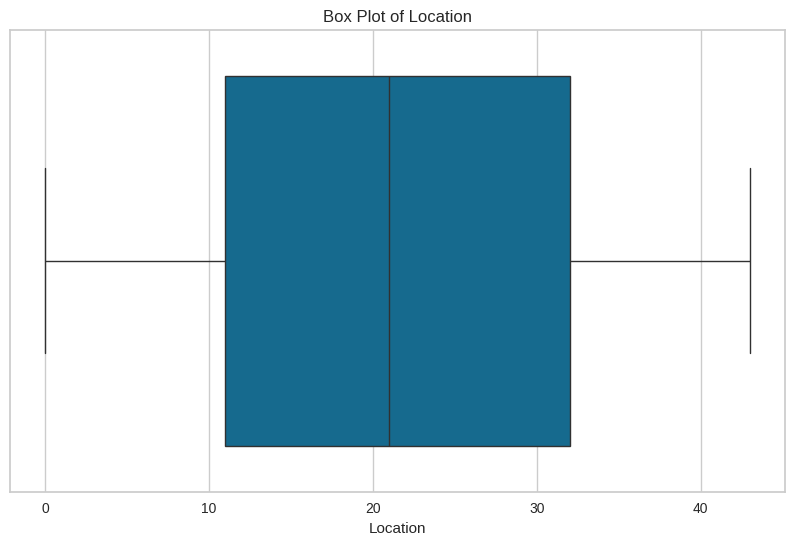

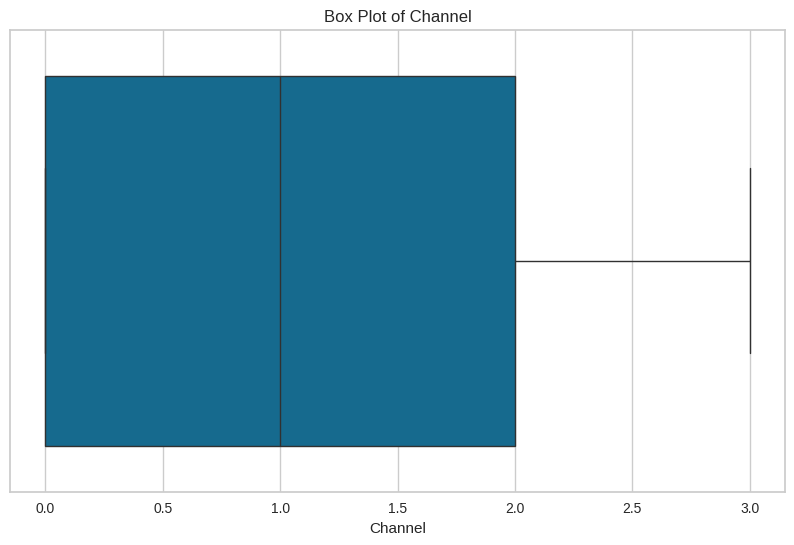

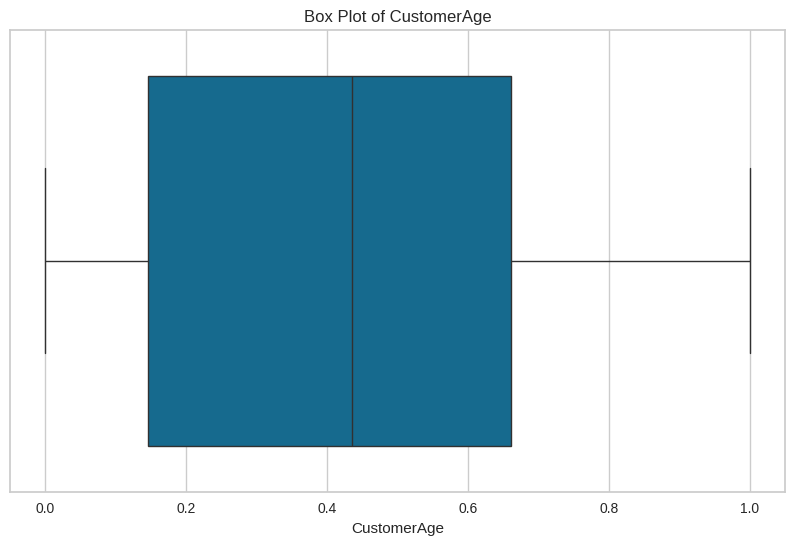

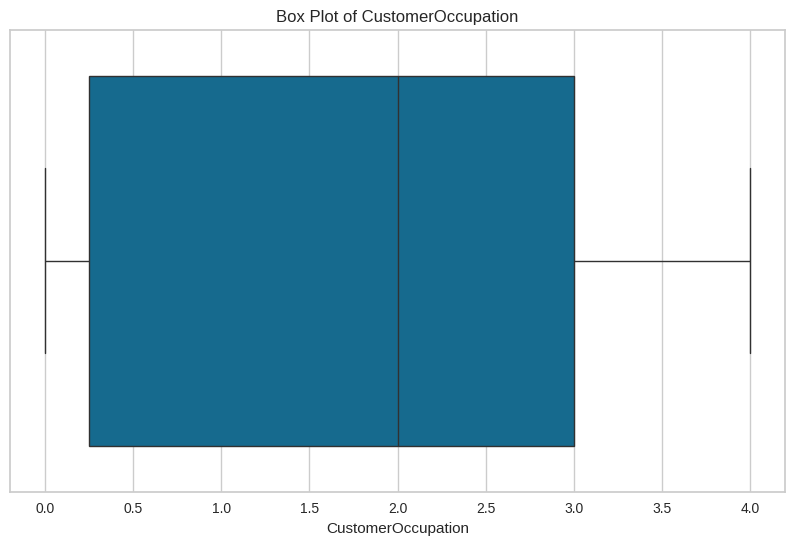

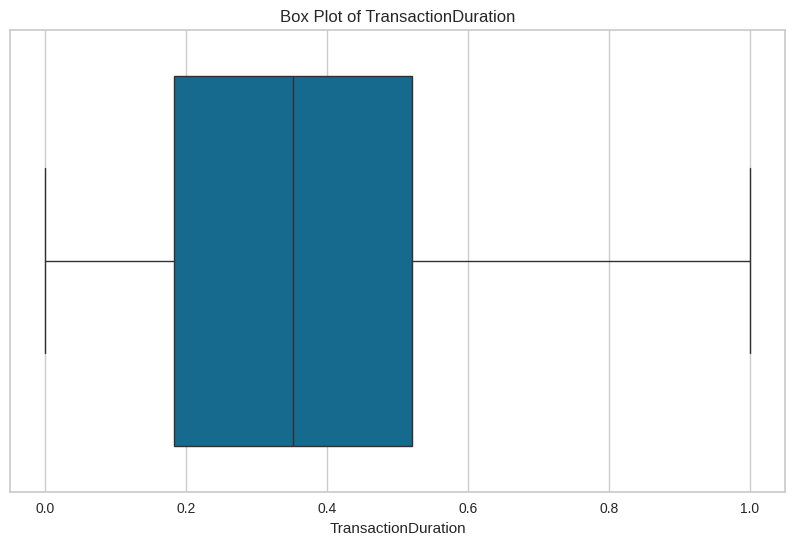

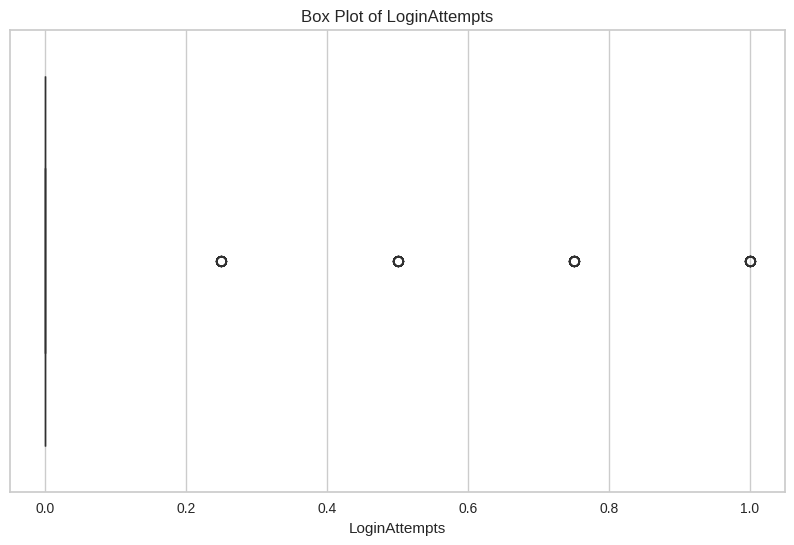

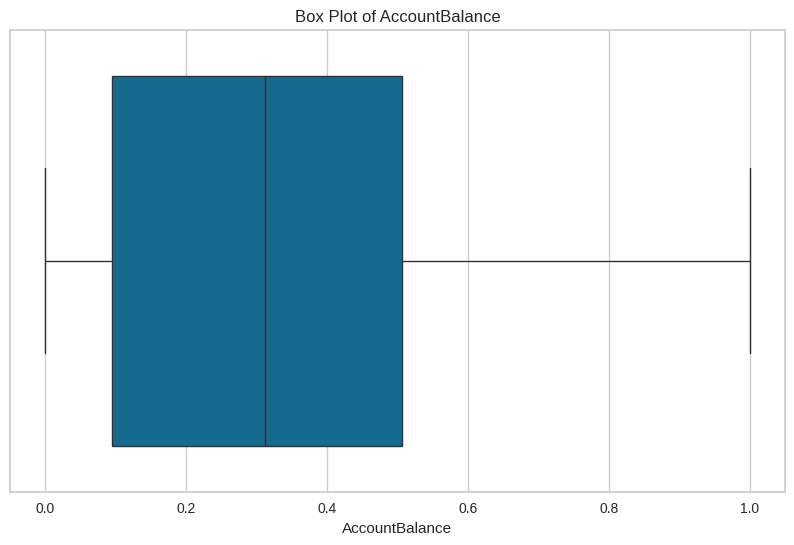

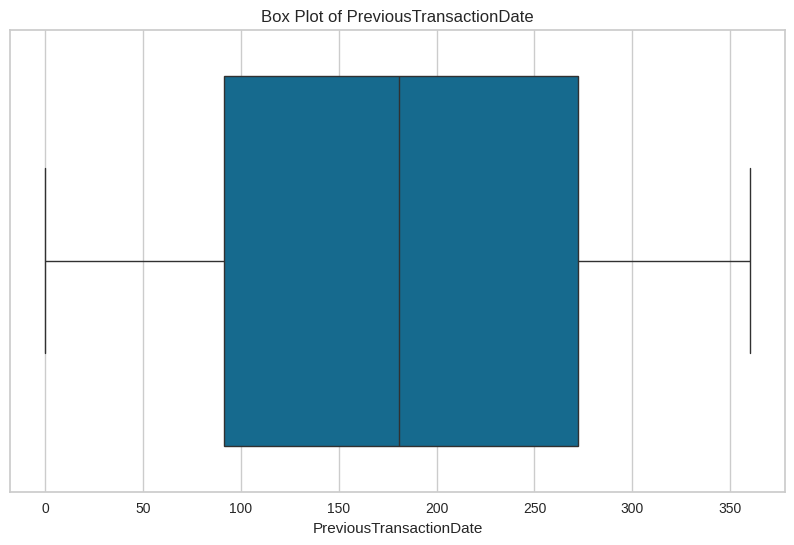

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
X_cleaned = df.copy()
for col in numeric_columns:
    # Melihat outlier dengan IQR (Interquartile Range)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outlier
    outliers = X_cleaned[(X_cleaned[col] < lower_bound) | (X_cleaned[col] > upper_bound)]

    # Menghapus outlier dari DataFrame
    X_cleaned = X_cleaned.drop(outliers.index)


for feature in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2514.000000,2514.000000,2514.000000,2514.000000,2514.00000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000
mean,0.154622,1256.328958,0.787987,21.284010,1.01074,0.429415,1.530231,0.377490,0.030430,0.336864,180.889021
std,0.151734,725.581982,0.437042,12.397534,0.83084,0.286157,1.150477,0.240156,0.148674,0.260683,103.956287
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043213,628.250000,1.000000,11.000000,0.00000,0.145161,0.250000,0.182759,0.000000,0.095324,91.250000
50%,0.110014,1256.500000,1.000000,21.000000,1.00000,0.435484,2.000000,0.351724,0.000000,0.311416,181.000000
75%,0.213328,1884.750000,1.000000,32.000000,2.00000,0.661290,3.000000,0.520690,0.000000,0.506870,272.000000
max,1.000000,2485.000000,2.000000,43.000000,3.00000,1.000000,4.000000,1.000000,1.000000,1.000000,360.000000


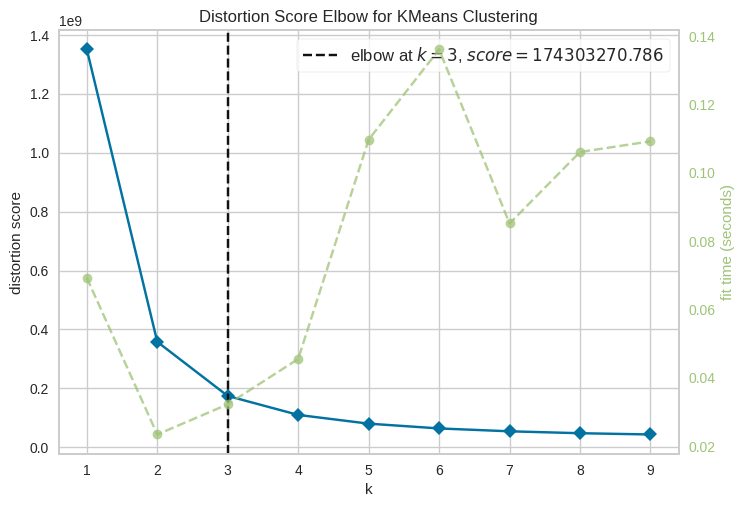

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans(n_init=10, random_state=42) # Added n_init and random_state for reproducibility

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df) # Changed X to df

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [21]:
# Menggunakan algoritma K-Means Clustering
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 3 # Changed k to 3 based on the elbow plot

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(df, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = df[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        print(f"\nCluster {cluster_id}:")
        print(cluster_data.describe().loc[['mean', 'min', 'max']]) # Using describe to show mean, min, max


# Analisis karakteristik setiap cluster
analyze_clusters(df, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 0:
      TransactionAmount  TransactionDate  TransactionType  Location   Channel  \
mean           0.157658           1261.0         0.789725  21.41816  0.998805   
min            0.000031            843.0         0.000000   0.00000  0.000000   
max            1.000000           1679.0         2.000000  43.00000  3.000000   

      CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
mean     0.449358            1.553166             0.380901       0.022401   
min      0.000000            0.000000             0.000000       0.000000   
max      1.000000            4.000000             0.996552       1.000000   

      AccountBalance  PreviousTransactionDate  
mean        0.333101               177.179211  
min         0.001125                 0.000000  
max         0.997144               360.000000  

Cluster 1:
      TransactionAmount  TransactionDate  TransactionType  Location   Channel  \
mean           0.148919       

Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(df, labels)
print(silhouette_avg)

0.5406452875333937


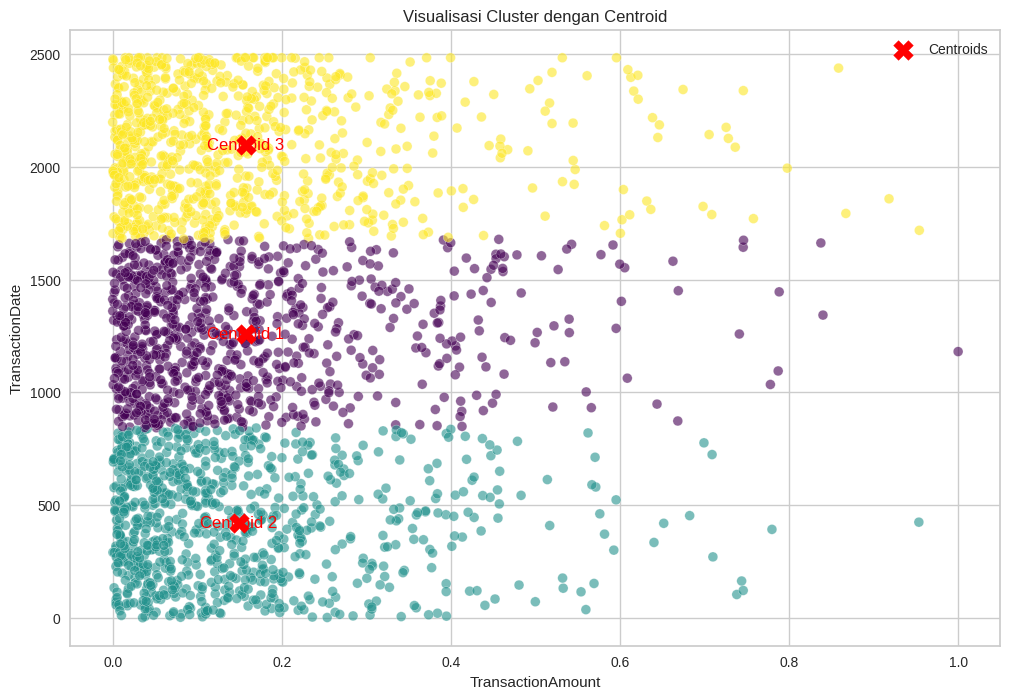

Nilai Centroids:
Centroid 1: TransactionAmount = 0.16, TransactionDate = 1261.00
Centroid 2: TransactionAmount = 0.15, TransactionDate = 421.00
Centroid 3: TransactionAmount = 0.16, TransactionDate = 2095.98


In [24]:
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data, excluding the 'Cluster' column
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel(df.columns[0]) # Use actual column names for labels
plt.ylabel(df.columns[1]) # Use actual column names for labels
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: {df.columns[0]} = {centroid[0]:.2f}, {df.columns[1]} = {centroid[1]:.2f}")

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [25]:
# Membangun model menggunakan PCA.

pca =PCA(n_components=2)
df_pca = pca.fit_transform(df)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
PCA_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(PCA_df)

KMeans(n_clusters=3)

In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA

joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
df['Cluster'] = labels
agregasi_data = df[numerical_cols + ['Cluster']]
agg_result = agregasi_data.groupby("Cluster")[numerical_cols].agg(["mean", "min", "max"])
pd.set_option('display.max_columns', None)
agg_result.head()


TransactionAmount                     CustomerAge            \
                     mean       min       max        mean  min  max   
Cluster                                                               
0                0.157658  0.000031  1.000000    0.449358  0.0  1.0   
1                0.148919  0.000313  0.953561    0.413405  0.0  1.0   
2                0.157339  0.000000  0.954092    0.425582  0.0  1.0   

        TransactionDuration                LoginAttempts            \
                       mean  min       max          mean  min  max   
Cluster                                                              
0                  0.380901  0.0  0.996552      0.022401  0.0  1.0   
1                  0.368389  0.0  0.996552      0.037367  0.0  1.0   
2                  0.383267  0.0  1.000000      0.031475  0.0  1.0   

        AccountBalance                      
                  mean       min       max  
Cluster                                     
0             0.333101  0.001125  0.997144  
1             0.333953  0.000064  0.997633  
2             0.343582  0.000000  1.000000

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (Nasabah bertransaksi besar dan saldo rendah)**:
  - **Rata-rata (mean) AccountBalance:** 0.333101
  - **Rata-rata (mean) LoginAttempts:** 0.022401
  - **Rata-rata (mean) CustomerAge:** 0.449358
  - **Rata-rata (mean) TransactionAmount:** 0.157658
  - **Analisis:** Cluster ini mencakup pelanggan yang memiliki rata rata saldo terendah dibandingkan dengan cluster yang lain dan memiliki rata rata jumlah transaksi tertinggi dibandingkan dengan cluster yang lain. Pelanggan dalam cluster ini cenderung sering melakukan transaksi dan sekali transaksi dalam jumlah yang besar.
2. **Cluster 2: (Nasabah yang bertransaksi rendah dan dan saldo menengah)**:
  - **Rata-rata (mean) AccountBalance:** 0.333953
  - **Rata-rata (mean) LoginAttempts:** 0.037367
  - **Rata-rata (mean) CustomerAge:** 0.413405
  - **Rata-rata (mean) TransactionAmount:** 0.148919
  - **Analisis:** Cluster ini mencakup pelanggan yang memiliki rata rata saldo di posisi menengah  dan memiliki rata rata jumlah transaksi terendah dibandingkan dengan cluster yang lain. Pelanggan dalam cluster ini cenderung jarang melakukan transaksi dan dan sekali transaksi dalam jumlah yang kecil.

  3. **Cluster 3: (Nasabah yang bertransaksi dan saldo besar)**:
  - **Rata-rata (mean) AccountBalance:** 0.343582
  - **Rata-rata (mean) LoginAttempts:** 0.031475
  - **Rata-rata (mean) CustomerAge:** 0.425582
  - **Rata-rata (mean) TransactionAmount:** 0.157339
  - **Analisis:** Cluster ini mencakup pelanggan yang memiliki rata rata saldo tertinggi dibandingkan dengan cluster yang lain dan memiliki rata rata jumlah transaksi tinggi namun tidak setinggi pada cluster 1. Pelanggan dalam cluster ini cenderung sering melakukan transaksi dan sekali transaksi dalam jumlah yang sangat besar.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df = df.rename(columns={'Cluster': 'Target'})
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,1
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,0
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,0
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,1
4,0.006874,1939,0,1,2,0.435484,3,0.648276,0.0,0.492591,16,2


In [29]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# inverse dataset ke rentang normal untuk numerikal
df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,1
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,0
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,0
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,1
4,13.45,1939,0,1,2,45.0,3,198.0,1.0,7429.40,16,2


In [31]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [32]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [34]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.